# Data Reading

The first step of the analysis consists of reading and storing the data in a Pandas data frame.

In [180]:
import pandas as pd

In [181]:
# import data science 2023 salaries dataset into a pandas data frame

ds_salaries_df = pd.read_csv('ds_salaries.csv')

In [182]:
# find number of rows and columns

ds_salaries_df.shape
print('Rows: {}, Columns: {}'.format(ds_salaries_df.shape[0], ds_salaries_df.shape[1]))

Rows: 3755, Columns: 11


In [183]:
# visualize column names

ds_salaries_df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [184]:
# check unique values of each column

for column in ds_salaries_df.columns:
    print('Column: {} - Unique Values: {}'.format(column, ds_salaries_df[column].unique()))

Column: work_year - Unique Values: [2023 2022 2020 2021]
Column: experience_level - Unique Values: ['SE' 'MI' 'EN' 'EX']
Column: employment_type - Unique Values: ['FT' 'CT' 'FL' 'PT']
Column: job_title - Unique Values: ['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Eng

In [185]:
ds_salaries_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


# Exploratory Data Analysis and Data Cleaning

In [186]:
# summary of the data frame

ds_salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [187]:
# transform the column work_year into a string data type

ds_salaries_df['work_year'] = ds_salaries_df['work_year'].astype(str)

In [188]:
print(ds_salaries_df['work_year'].dtypes)

object


In [189]:
ds_salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   object
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(3), object(8)
memory usage: 322.8+ KB


In [190]:
#find duplicate rows across all columns

duplicateRows = ds_salaries_df[ds_salaries_df.duplicated()]
duplicateRows

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
115,2023,SE,FT,Data Scientist,150000,USD,150000,US,0,US,M
123,2023,SE,FT,Analytics Engineer,289800,USD,289800,US,0,US,M
153,2023,MI,FT,Data Engineer,100000,USD,100000,US,100,US,M
154,2023,MI,FT,Data Engineer,70000,USD,70000,US,100,US,M
160,2023,SE,FT,Data Engineer,115000,USD,115000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
3439,2022,MI,FT,Data Scientist,78000,USD,78000,US,100,US,M
3440,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
3441,2022,SE,FT,Data Engineer,115000,USD,115000,US,100,US,M
3586,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L


In [191]:
ds_salaries_df.duplicated().sum()

1171

In [192]:
# drop duplicate rows

ds_salaries_df = ds_salaries_df.drop_duplicates()

In [193]:
ds_salaries_df.duplicated().sum()

0

In [194]:
ds_salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   object
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   int64 
 9   company_location    2584 non-null   object
 10  company_size        2584 non-null   object
dtypes: int64(3), object(8)
memory usage: 242.2+ KB


In [195]:
# Removing leading and trailing white spaces from all string datatype columns
for col in ds_salaries_df.select_dtypes(include='object'):
    ds_salaries_df[col] = ds_salaries_df[col].str.strip()

# Printing the DataFrame after removing white spaces
ds_salaries_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [196]:
# Getting all unique values in the 'job_title' column
unique_job_titles = ds_salaries_df['job_title'].unique()

# Converting unique job titles to a list
unique_job_titles_list = list(unique_job_titles)

# Printing the list of unique job titles
print(unique_job_titles_list)

['Principal Data Scientist', 'ML Engineer', 'Data Scientist', 'Applied Scientist', 'Data Analyst', 'Data Modeler', 'Research Engineer', 'Analytics Engineer', 'Business Intelligence Engineer', 'Machine Learning Engineer', 'Data Strategist', 'Data Engineer', 'Computer Vision Engineer', 'Data Quality Analyst', 'Compliance Data Analyst', 'Data Architect', 'Applied Machine Learning Engineer', 'AI Developer', 'Research Scientist', 'Data Analytics Manager', 'Business Data Analyst', 'Applied Data Scientist', 'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer', 'Head of Data', 'Data Science Manager', 'Data Manager', 'Machine Learning Researcher', 'Big Data Engineer', 'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer', 'Director of Data Science', 'Machine Learning Scientist', 'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician', 'Applied Machine Learning Scientist', 'Lead Data Scientist', 'Cloud Database Engineer', 'Financial Data Analyst', 'Data Infrastructure Engi

In [197]:
# Printing the number of unique job titles
print("Number of unique job titles:", len(unique_job_titles_list))

Number of unique job titles: 93


# Find out subtle repetitions in unique_job_titles_list

For the job title, there was a subtle repetition that could have affected the result of the analysis. Machine learning Engineer and ML Engineer were included in the dataset. This is basically the same job title written differently.

In [198]:
# This dictionary (job_title_mappings) defines the mapping between similar job titles. 
# In this case, it indicates that 'ML Engineer' should be replaced with 'Machine Learning Engineer'.

job_title_mappings = {
    'ML Engineer': 'Machine Learning Engineer'
}

ds_salaries_df['job_title'] = ds_salaries_df['job_title'].map(job_title_mappings).fillna(ds_salaries_df['job_title'])

'''
Here, the map function is used to replace values in the 'job_title' column based on the mappings defined in job_title_mappings.
The fillna method is then used to fill any NaN (Not a Number) values with the original values from the 'job_title' column.
This step ensures that if a job title is not found in the mapping, it remains unchanged.
'''

ds_salaries_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,Machine Learning Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,Machine Learning Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [199]:
# Getting all unique values in the 'job_title' column
new_unique_job_titles = ds_salaries_df['job_title'].unique()

# Converting unique job titles to a list
new_unique_job_titles_list = list(new_unique_job_titles)

# Printing the number of unique job titles
print("Number of new unique job titles:", len(new_unique_job_titles_list))

Number of new unique job titles: 92


In [200]:
#find duplicate rows across all columns

newduplicateRows = ds_salaries_df[ds_salaries_df.duplicated()]
newduplicateRows

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1364,2023,SE,FT,Machine Learning Engineer,220000,USD,220000,US,0,US,M
1365,2023,SE,FT,Machine Learning Engineer,150000,USD,150000,US,0,US,M
1525,2023,SE,FT,Machine Learning Engineer,200000,USD,200000,US,0,US,M
1660,2023,SE,FT,Machine Learning Engineer,135000,USD,135000,US,0,US,M
1724,2023,SE,FT,Machine Learning Engineer,289076,USD,289076,US,0,US,M
1725,2023,SE,FT,Machine Learning Engineer,202353,USD,202353,US,0,US,M
2792,2022,SE,FT,Machine Learning Engineer,195400,USD,195400,US,100,US,L
2793,2022,SE,FT,Machine Learning Engineer,131300,USD,131300,US,100,US,L


In [201]:
ds_salaries_df.duplicated().sum()

8

In [202]:
# drop duplicate rows

ds_salaries_df = ds_salaries_df.drop_duplicates()

In [203]:
ds_salaries_df.duplicated().sum()

0

In [204]:
ds_salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2576 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2576 non-null   object
 1   experience_level    2576 non-null   object
 2   employment_type     2576 non-null   object
 3   job_title           2576 non-null   object
 4   salary              2576 non-null   int64 
 5   salary_currency     2576 non-null   object
 6   salary_in_usd       2576 non-null   int64 
 7   employee_residence  2576 non-null   object
 8   remote_ratio        2576 non-null   int64 
 9   company_location    2576 non-null   object
 10  company_size        2576 non-null   object
dtypes: int64(3), object(8)
memory usage: 241.5+ KB


In [205]:
# number of rows and columns in dataset without any duplicates
ds_salaries_df.shape
print('Rows: {}, Columns: {}'.format(ds_salaries_df.shape[0], ds_salaries_df.shape[1]))

Rows: 2576, Columns: 11


# Replace values in dataset

In [206]:
#  Replace values in experience-level column
ds_salaries_df['experience_level'] = ds_salaries_df['experience_level'].replace('EN', 'Entry-Level')
ds_salaries_df['experience_level'] = ds_salaries_df['experience_level'].replace('EX', 'Executive')
ds_salaries_df['experience_level'] = ds_salaries_df['experience_level'].replace('MI', 'Mid-Level')
ds_salaries_df['experience_level'] = ds_salaries_df['experience_level'].replace('SE', 'Senior')

C:\Temp\ipykernel_11584\726137569.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_salaries_df['experience_level'] = ds_salaries_df['experience_level'].replace('EN', 'Entry-Level')
C:\Temp\ipykernel_11584\726137569.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_salaries_df['experience_level'] = ds_salaries_df['experience_level'].replace('EX', 'Executive')
C:\Temp\ipykernel_11584\726137569.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [207]:
ds_salaries_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,Mid-Level,CT,Machine Learning Engineer,30000,USD,30000,US,100,US,S
2,2023,Mid-Level,CT,Machine Learning Engineer,25500,USD,25500,US,100,US,S
3,2023,Senior,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,Senior,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [208]:
#Replace values in employment_type column
ds_salaries_df['employment_type'] = ds_salaries_df['employment_type'].replace('FT', 'Full-Time')
ds_salaries_df['employment_type'] = ds_salaries_df['employment_type'].replace('CT', 'Contractor')
ds_salaries_df['employment_type'] = ds_salaries_df['employment_type'].replace('FL', 'Freelancer')
ds_salaries_df['employment_type'] = ds_salaries_df['employment_type'].replace('PT', 'Part-Time')

C:\Temp\ipykernel_11584\556390153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_salaries_df['employment_type'] = ds_salaries_df['employment_type'].replace('FT', 'Full-Time')
C:\Temp\ipykernel_11584\556390153.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_salaries_df['employment_type'] = ds_salaries_df['employment_type'].replace('CT', 'Contractor')
C:\Temp\ipykernel_11584\556390153.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [254]:
ds_salaries_df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full-Time,Principal Data Scientist,80000,EUR,85847,ES,Fully Remote,ES,L
1,2023,Mid-Level,Contractor,Machine Learning Engineer,30000,USD,30000,US,Fully Remote,US,S
2,2023,Mid-Level,Contractor,Machine Learning Engineer,25500,USD,25500,US,Fully Remote,US,S
3,2023,Senior,Full-Time,Data Scientist,175000,USD,175000,CA,Fully Remote,CA,M
4,2023,Senior,Full-Time,Data Scientist,120000,USD,120000,CA,Fully Remote,CA,M


# EXPLORATORY DATA ANALYSIS

### Remote Work Impact on Compensation

The remote_ratio column has 3 values: {100, 50 ,0}. Let's replace these values by names to categorize them better.
100: Fully Remote
50:  Hybrid
0:   In-person

In [210]:
#Replace values in remote_ratio column
ds_salaries_df['remote_ratio'] = ds_salaries_df['remote_ratio'].replace(100, 'Fully Remote')
ds_salaries_df['remote_ratio'] = ds_salaries_df['remote_ratio'].replace(50, 'Hybrid')
ds_salaries_df['remote_ratio'] = ds_salaries_df['remote_ratio'].replace(0, 'In-person')

ds_salaries_df

C:\Temp\ipykernel_11584\2599109814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_salaries_df['remote_ratio'] = ds_salaries_df['remote_ratio'].replace(100, 'Fully Remote')
C:\Temp\ipykernel_11584\2599109814.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_salaries_df['remote_ratio'] = ds_salaries_df['remote_ratio'].replace(50, 'Hybrid')
C:\Temp\ipykernel_11584\2599109814.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full-Time,Principal Data Scientist,80000,EUR,85847,ES,Fully Remote,ES,L
1,2023,Mid-Level,Contractor,Machine Learning Engineer,30000,USD,30000,US,Fully Remote,US,S
2,2023,Mid-Level,Contractor,Machine Learning Engineer,25500,USD,25500,US,Fully Remote,US,S
3,2023,Senior,Full-Time,Data Scientist,175000,USD,175000,CA,Fully Remote,CA,M
4,2023,Senior,Full-Time,Data Scientist,120000,USD,120000,CA,Fully Remote,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior,Full-Time,Data Scientist,412000,USD,412000,US,Fully Remote,US,L
3751,2021,Mid-Level,Full-Time,Principal Data Scientist,151000,USD,151000,US,Fully Remote,US,L
3752,2020,Entry-Level,Full-Time,Data Scientist,105000,USD,105000,US,Fully Remote,US,S
3753,2020,Entry-Level,Contractor,Business Data Analyst,100000,USD,100000,US,Fully Remote,US,L


### Median Salary Trends Over the Years by Remote Work Ratio in the US

The use of median salary is preferred over mean in data analysis due to its resistance to outliers, making it a robust measure for skewed distributions and real-world scenarios where extreme values can distort the average. Its interpretability and simplicity further enhance its effectiveness in providing a representative central tendency in salary comparisons.

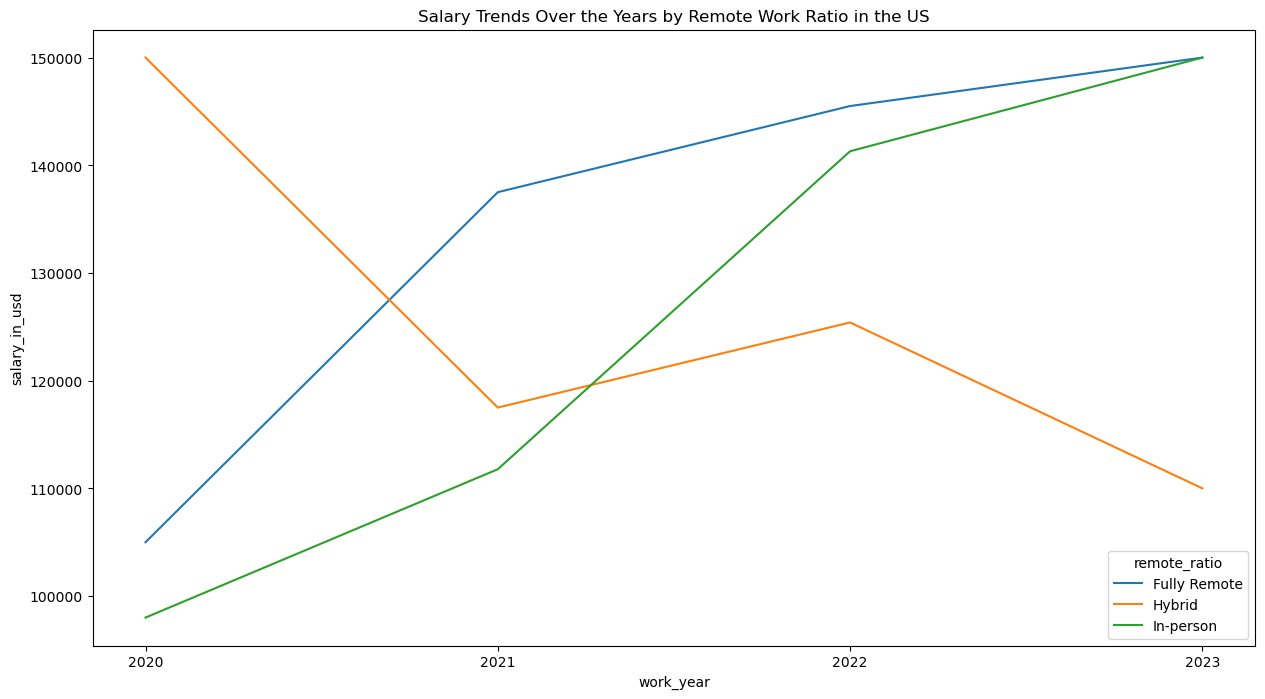

In [211]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a variable df
# Filter data for US locations
us_data = ds_salaries_df[ds_salaries_df['company_location'] == 'US']

# Group by relevant factors
grouped_data = us_data.groupby(['remote_ratio', 'work_year'])

# Calculate median salary for each group
agg_data = grouped_data['salary_in_usd'].median().reset_index()

# Create line plot for salary trends across remote work ratios
plt.figure(figsize=(15, 8))
sns.lineplot(x='work_year', y='salary_in_usd', hue='remote_ratio', data=agg_data)
plt.title('Salary Trends Over the Years by Remote Work Ratio in the US')
plt.show()


1) During peak pandemic years, 2020 and 2021, the median salaries of people who worked fully remote rose rapidly due to the restrictions and adverse conditions imposed by pandemic.During 2022, as the restrictions were gradually lifted and people slowly began transitioning to in-person work culture, interestingly this did not affect the fully remote job compensation negatively. In fact, the compensation has an increasing trend in 2022 and 2023.

2) In-person work culture has also gained monentum and has an increasing trend in salary compensation over the 4 years. In fact,  the median salaries for working in-person and completely remotely are at par in 2023. So, it's safe to say that there is no difference between work from home and in person compensation during 2023.

3) The hybrid work-culture has seen a rapid decline in median salary over the 4 years and at present, in 2023, is the least lucrative work style.

In [212]:
# Group by relevant factors
grouped_data2 = us_data.groupby(['remote_ratio', 'job_title'])

# Calculate median salary for each group
agg_data2 = grouped_data2['salary_in_usd'].median().reset_index()

# Identify the highest and lowest-paid job titles for each remote work ratio for the year 2023

highest_paid_jobs = agg_data2.groupby('remote_ratio').apply(lambda x: x[x['salary_in_usd'] == x['salary_in_usd'].max()])
lowest_paid_jobs = agg_data2.groupby('remote_ratio').apply(lambda x: x[x['salary_in_usd'] == x['salary_in_usd'].min()])

# Display results
print("Highest Paid Job Titles by Remote Work Ratio:")
print(highest_paid_jobs)

print("\nLowest Paid Job Titles by Remote Work Ratio:")
print(lowest_paid_jobs)

Highest Paid Job Titles by Remote Work Ratio:
                  remote_ratio               job_title  salary_in_usd
remote_ratio                                                         
Fully Remote 19   Fully Remote     Data Analytics Lead       405000.0
Hybrid       69         Hybrid  Data Science Tech Lead       375000.0
In-person    112     In-person      Lead Data Engineer       276000.0

Lowest Paid Job Titles by Remote Work Ratio:
                  remote_ratio          job_title  salary_in_usd
remote_ratio                                                    
Fully Remote 6    Fully Remote         BI Analyst        12000.0
Hybrid       63         Hybrid    BI Data Analyst        45629.5
In-person    111     In-person  Lead Data Analyst        68000.0


In [213]:
# The index values are retained in the resulting DataFrame after the groupby operation and subsequent filtering.

# This will reset the index and remove the old index column, providing a more standard index starting from 0.
highest_paid_jobs.reset_index(drop=True, inplace=True)
lowest_paid_jobs.reset_index(drop=True, inplace=True)

In [214]:
print("Highest paid job titles in 2023 based on the different categories in remote_ratio column:")
highest_paid_jobs

Highest paid job titles in 2023 based on the different categories in remote_ratio column:


,remote_ratio,job_title,salary_in_usd
0,Fully Remote,Data Analytics Lead,405000.0
1,Hybrid,Data Science Tech Lead,375000.0
2,In-person,Lead Data Engineer,276000.0


In [215]:
print("Lowest paid job titles in 2023 based on the different categories in remote_ratio column:")
lowest_paid_jobs

Lowest paid job titles in 2023 based on the different categories in remote_ratio column:


,remote_ratio,job_title,salary_in_usd
0,Fully Remote,BI Analyst,12000.0
1,Hybrid,BI Data Analyst,45629.5
2,In-person,Lead Data Analyst,68000.0


Now, we want to figure out the company size, experience level and employment type of highest paid job titles.

In [216]:
# Select relevant columns from highest_paid_jobs DataFrame
selected_columns = highest_paid_jobs[['remote_ratio', 'job_title', 'salary_in_usd']]

# Merge with us_data to get additional information
merged_data = selected_columns.merge(us_data[['job_title', 'company_size', 'experience_level', 'employment_type']], on='job_title', how='left')

# Drop duplicates to keep unique rows
unique_rows = merged_data.drop_duplicates().reset_index(drop=True)

# Print the final result
unique_rows

,remote_ratio,job_title,salary_in_usd,company_size,experience_level,employment_type
0,Fully Remote,Data Analytics Lead,405000.0,L,Senior,Full-Time
1,Hybrid,Data Science Tech Lead,375000.0,L,Senior,Full-Time
2,In-person,Lead Data Engineer,276000.0,L,Senior,Full-Time
3,In-person,Lead Data Engineer,276000.0,S,Senior,Full-Time
4,In-person,Lead Data Engineer,276000.0,M,Mid-Level,Full-Time


Now, we want to figure out the company size, experience level and employment type of lowest paid job titles.

In [217]:
# Select relevant columns from lowest_paid_jobs DataFrame
selected_columns = lowest_paid_jobs[['remote_ratio', 'job_title', 'salary_in_usd']]

# Merge with us_data to get additional information
merged_data = selected_columns.merge(us_data[['job_title', 'company_size', 'experience_level', 'employment_type']], on='job_title', how='left')

# Drop duplicates to keep unique rows
unique_rows = merged_data.drop_duplicates()

# Print the final result
unique_rows

,remote_ratio,job_title,salary_in_usd,company_size,experience_level,employment_type
0,Fully Remote,BI Analyst,12000.0,M,Senior,Full-Time
4,Fully Remote,BI Analyst,12000.0,L,Entry-Level,Part-Time
5,Fully Remote,BI Analyst,12000.0,L,Entry-Level,Full-Time
6,Hybrid,BI Data Analyst,45629.5,L,Entry-Level,Full-Time
7,Hybrid,BI Data Analyst,45629.5,S,Entry-Level,Full-Time
8,Hybrid,BI Data Analyst,45629.5,M,Mid-Level,Full-Time
9,Hybrid,BI Data Analyst,45629.5,L,Executive,Full-Time
10,Hybrid,BI Data Analyst,45629.5,L,Mid-Level,Full-Time
12,In-person,Lead Data Analyst,68000.0,L,Mid-Level,Full-Time
13,In-person,Lead Data Analyst,68000.0,L,Senior,Full-Time


### Analyze remote_ratio compensation factors exclusively for entry-level jobs in US in 2023

In [218]:

# Filter data for US locations and Entry-Level experience
us_data_entry_level = ds_salaries_df[(ds_salaries_df['company_location'] == 'US') & (ds_salaries_df['experience_level'] == 'Entry-Level')]

# Group by relevant factors
grouped_data3 = us_data_entry_level.groupby(['remote_ratio', 'job_title'])

# Calculate median salary for each group
agg_data3 = grouped_data3['salary_in_usd'].median().reset_index()

# Identify the highest and lowest-paid job titles for each remote work ratio for the year 2023
highest_paid_jobs_entry_level = agg_data3.groupby('remote_ratio').apply(lambda x: x[x['salary_in_usd'] == x['salary_in_usd'].max()])
lowest_paid_jobs_entry_level = agg_data3.groupby('remote_ratio').apply(lambda x: x[x['salary_in_usd'] == x['salary_in_usd'].min()])

# Reset the index before selecting columns
highest_paid_jobs_entry_level.reset_index(drop=True, inplace=True)
lowest_paid_jobs_entry_level.reset_index(drop=True, inplace=True)

In [219]:
# Select relevant columns from highest_paid_jobs_entry_level DataFrame
selected_columns_entry_level_high = highest_paid_jobs_entry_level[['remote_ratio', 'job_title', 'salary_in_usd']]

# Merge with us_data_entry_level to get additional information
merged_data_entry_level_high = selected_columns_entry_level_high.merge(
    us_data_entry_level[['job_title', 'company_size', 'experience_level', 'employment_type']], on='job_title', how='left')

# Drop duplicates to keep unique rows
unique_rows_entry_level_high = merged_data_entry_level_high.drop_duplicates()

# Print the final result for Entry-Level
print("Highest Paid Entry-Level Job Titles by Remote Work Ratio:")

unique_rows_entry_level_high


Highest Paid Entry-Level Job Titles by Remote Work Ratio:


,remote_ratio,job_title,salary_in_usd,company_size,experience_level,employment_type
0,Fully Remote,Machine Learning Scientist,225000.0,L,Entry-Level,Full-Time
1,Hybrid,Research Scientist,220000.0,L,Entry-Level,Full-Time
2,Hybrid,Research Scientist,220000.0,M,Entry-Level,Full-Time
5,In-person,Computer Vision Engineer,172500.0,M,Entry-Level,Full-Time


In [220]:
# Select relevant columns from lowest_paid_jobs_entry_level DataFrame
selected_columns_entry_level_low = lowest_paid_jobs_entry_level[['remote_ratio', 'job_title', 'salary_in_usd']]

# Merge with us_data_entry_level to get additional information
merged_data_entry_level_low = selected_columns_entry_level_low.merge(
    us_data_entry_level[['job_title', 'company_size', 'experience_level', 'employment_type']], on='job_title', how='left')

# Drop duplicates to keep unique rows
unique_rows_entry_level_low = merged_data_entry_level_low.drop_duplicates()

# Print the final result for Entry-Level
print("Lowest Paid Entry-Level Job Titles by Remote Work Ratio:")

unique_rows_entry_level_low

Lowest Paid Entry-Level Job Titles by Remote Work Ratio:


,remote_ratio,job_title,salary_in_usd,company_size,experience_level,employment_type
0,Fully Remote,AI Scientist,12000.0,M,Entry-Level,Full-Time
1,Fully Remote,AI Scientist,12000.0,M,Entry-Level,Part-Time
2,Fully Remote,AI Scientist,12000.0,S,Entry-Level,Part-Time
3,Fully Remote,BI Analyst,12000.0,L,Entry-Level,Part-Time
4,Fully Remote,BI Analyst,12000.0,L,Entry-Level,Full-Time
5,Hybrid,Business Data Analyst,48000.0,L,Entry-Level,Full-Time
6,Hybrid,Business Data Analyst,48000.0,L,Entry-Level,Contractor
7,In-person,Data Analyst,62500.0,M,Entry-Level,Full-Time
16,In-person,Data Analyst,62500.0,L,Entry-Level,Full-Time
19,In-person,Data Analyst,62500.0,S,Entry-Level,Part-Time


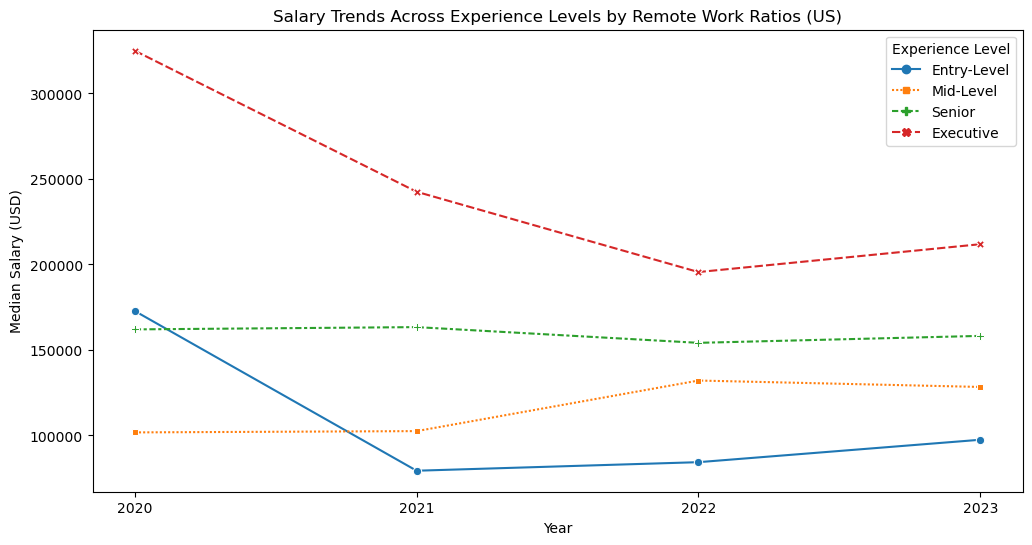

In [221]:
# Assuming your dataset is stored in a variable df
# Filter data for US locations
us_data = ds_salaries_df[ds_salaries_df['company_location'] == 'US']

# Specify the order of experience levels
experience_order = ['Entry-Level', 'Mid-Level', 'Senior', 'Executive']

# Group by relevant factors
grouped_data4 = us_data.groupby(['work_year', 'experience_level', 'remote_ratio'])

# Calculate median salary for each group
agg_data4 = grouped_data4['salary_in_usd'].median().reset_index()

# Plotting the salary trends for different remote work ratios across experience levels

# Plotting the salary trends for different remote work ratios with only 'experience_level' in the legend
plt.figure(figsize=(12, 6))
sns.lineplot(x='work_year', y='salary_in_usd', hue='experience_level', style='experience_level', markers=True,
             data=agg_data4, hue_order=experience_order, errorbar = None)
plt.title('Salary Trends Across Experience Levels by Remote Work Ratios (US)')
plt.xlabel('Year')
plt.ylabel('Median Salary (USD)')
plt.legend(title='Experience Level', bbox_to_anchor=(1, 1))
plt.show()

Both entry-level and executive level experienced a sharp decline in median salaries during the peak pandemic years from 2020 to 2021. Ever since then, the growth in median salaries over the subsequent years 2022 and 2023 has been marginal.
The median salary growth for senior level has seen a relatively constant trend.
The mid-level median salary has grown from from 2021 to 2022 which is the period when the pandemic had gradually started coming under control.

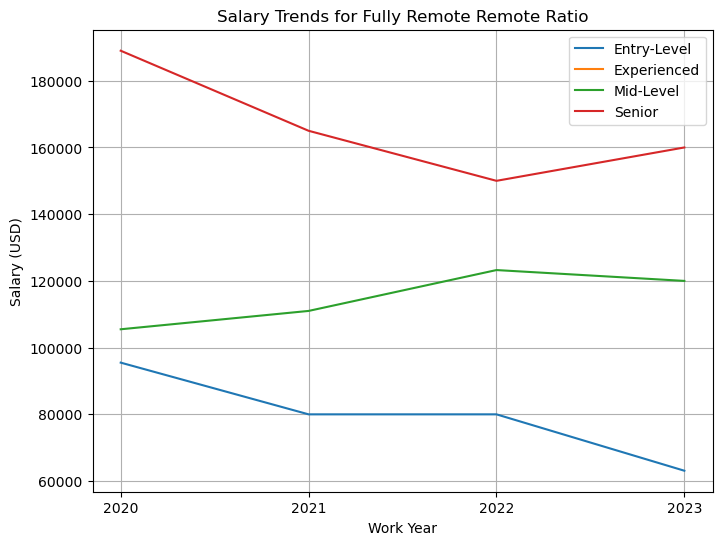

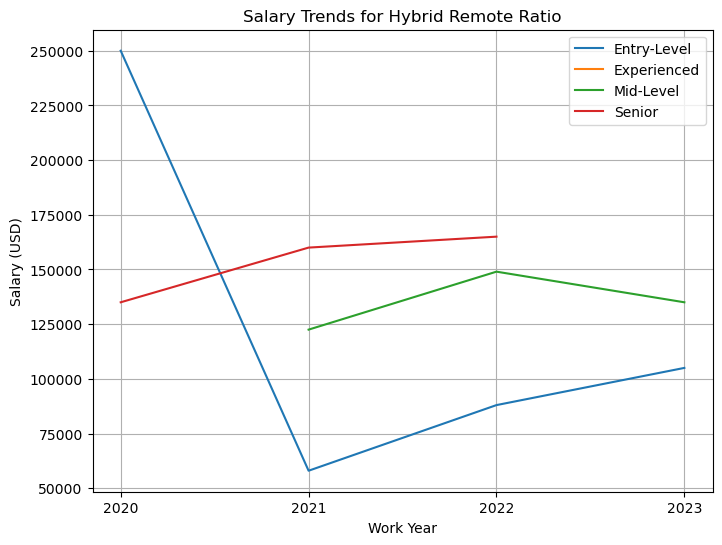

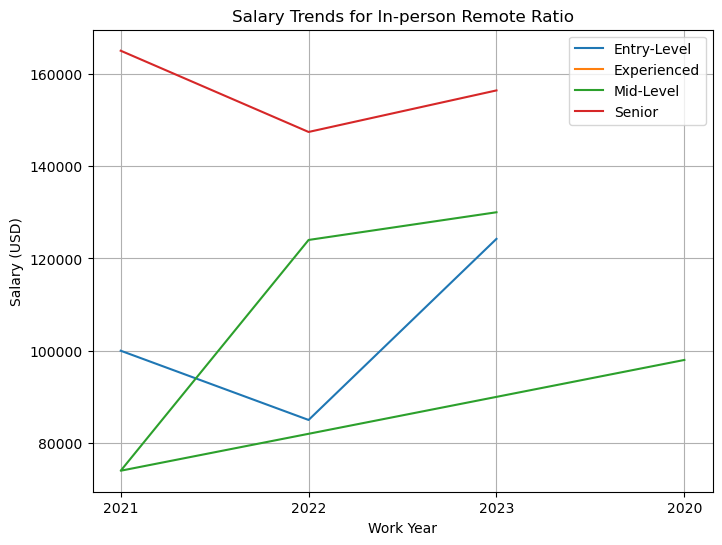

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Ensure pandas is imported

# Assuming your dataset is stored in a variable df
# Filter data for US locations
us_data = ds_salaries_df[ds_salaries_df['company_location'] == 'US']

# Specify the order of experience levels
experience_order = ['Entry-Level', 'Experienced', 'Mid-Level', 'Senior']

# Group by relevant factors
grouped_data4 = us_data.groupby(['work_year', 'experience_level', 'remote_ratio'])

# Calculate median salary for each group
agg_data4 = grouped_data4['salary_in_usd'].median().reset_index()

# Convert 'work_year' to categorical and reorder categories
agg_data4['work_year'] = pd.Categorical(agg_data4['work_year'], 
                                        categories=sorted(agg_data4['work_year'].unique()), 
                                        ordered=True)

# Reorder categories to display in the desired order
agg_data4['work_year'] = agg_data4['work_year'].cat.reorder_categories(['2020', '2021', '2022', '2023'], ordered=True)

# Create separate plots for each remote_ratio
remote_ratios = agg_data4['remote_ratio'].unique()

for ratio in remote_ratios:
    # Filter data for the specific remote_ratio
    data_for_ratio = agg_data4[agg_data4['remote_ratio'] == ratio]

    # Create a new plot for each remote_ratio
    plt.figure(figsize=(8, 6))
    plt.title(f"Salary Trends for {ratio} Remote Ratio")
    
    # Plot the salary trends
    for exp_level in experience_order:
        exp_data = data_for_ratio[data_for_ratio['experience_level'] == exp_level]
        plt.plot(exp_data['work_year'], exp_data['salary_in_usd'], label=exp_level)

    plt.xlabel('Work Year')
    plt.ylabel('Salary (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()


In [223]:
agg_data4

,work_year,experience_level,remote_ratio,salary_in_usd
0,2020,Entry-Level,Fully Remote,95500.0
1,2020,Entry-Level,Hybrid,250000.0
2,2020,Executive,Fully Remote,325000.0
3,2020,Mid-Level,Fully Remote,105500.0
4,2020,Mid-Level,In-person,98000.0
5,2020,Senior,Fully Remote,189000.0
6,2020,Senior,Hybrid,135000.0
7,2021,Entry-Level,Fully Remote,80000.0
8,2021,Entry-Level,Hybrid,58000.0
9,2021,Entry-Level,In-person,100000.0


# DATA MODELLING

### MULTIPLE LINEAR REGRESSION

#### Prepare Data: 

In [224]:
# Filter data for US company locations and the required years (2020-2023)
us_predict_data = ds_salaries_df[
    (ds_salaries_df['company_location'] == 'US') &
    ((ds_salaries_df['work_year'] == '2020') |
     (ds_salaries_df['work_year'] == '2021') |
     (ds_salaries_df['work_year'] == '2022') |
     (ds_salaries_df['work_year'] == '2023'))
]

# Group by job title, work_year, and other specified columns to calculate average salary
grouped_data = us_predict_data.groupby(['job_title', 'work_year', 'experience_level', 'employment_type', 
                                        'employee_residence', 'remote_ratio', 'company_location'])

# Calculate the mean salary for each group
avg_predict_salary = grouped_data['salary_in_usd'].mean().reset_index()

avg_predict_salary

,job_title,work_year,experience_level,employment_type,employee_residence,remote_ratio,company_location,salary_in_usd
0,AI Developer,2023,Mid-Level,Full-Time,US,Fully Remote,US,200000.000000
1,AI Scientist,2021,Entry-Level,Part-Time,BR,Fully Remote,US,12000.000000
2,AI Scientist,2021,Entry-Level,Part-Time,PK,Fully Remote,US,12000.000000
3,AI Scientist,2022,Entry-Level,Full-Time,US,Fully Remote,US,50000.000000
4,AI Scientist,2022,Executive,Full-Time,US,Fully Remote,US,200000.000000
...,...,...,...,...,...,...,...,...
320,Research Scientist,2023,Mid-Level,Full-Time,US,Fully Remote,US,193633.333333
321,Research Scientist,2023,Mid-Level,Full-Time,US,In-person,US,116250.000000
322,Research Scientist,2023,Senior,Full-Time,US,Fully Remote,US,120000.000000
323,Research Scientist,2023,Senior,Full-Time,US,In-person,US,180548.823529


In [225]:

# Create a feature for the year 2024
avg_predict_salary['work_year'] = pd.to_numeric(avg_predict_salary['work_year'])
avg_salary_2024 = avg_predict_salary.copy()
avg_salary_2024['work_year'] = 2024

# Encoding categorical variables (job_title, work_year) with drop_first=True
avg_salary_encoded = pd.get_dummies(avg_predict_salary[['job_title', 'work_year', 'experience_level', 
                                                        'employment_type', 'employee_residence',
                                                       'remote_ratio', 'company_location']],
                                    drop_first=True)

In [226]:
avg_predict_salary

,job_title,work_year,experience_level,employment_type,employee_residence,remote_ratio,company_location,salary_in_usd
0,AI Developer,2023,Mid-Level,Full-Time,US,Fully Remote,US,200000.000000
1,AI Scientist,2021,Entry-Level,Part-Time,BR,Fully Remote,US,12000.000000
2,AI Scientist,2021,Entry-Level,Part-Time,PK,Fully Remote,US,12000.000000
3,AI Scientist,2022,Entry-Level,Full-Time,US,Fully Remote,US,50000.000000
4,AI Scientist,2022,Executive,Full-Time,US,Fully Remote,US,200000.000000
...,...,...,...,...,...,...,...,...
320,Research Scientist,2023,Mid-Level,Full-Time,US,Fully Remote,US,193633.333333
321,Research Scientist,2023,Mid-Level,Full-Time,US,In-person,US,116250.000000
322,Research Scientist,2023,Senior,Full-Time,US,Fully Remote,US,120000.000000
323,Research Scientist,2023,Senior,Full-Time,US,In-person,US,180548.823529


#### Handling Multicollinearity:

In [227]:
# Calculate VIF for predictors to check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = avg_salary_encoded.columns
vif_data["VIF"] = [variance_inflation_factor(avg_salary_encoded.values, i) for i in range(len(avg_salary_encoded.columns))]


In [228]:
print(vif_data)

                                         Feature         VIF
0                                      work_year  581.002499
1                         job_title_AI Scientist    8.392753
2                   job_title_Analytics Engineer   12.214419
3               job_title_Applied Data Scientist    3.010404
4    job_title_Applied Machine Learning Engineer    2.019039
..                                           ...         ...
99                         employee_residence_US  154.992465
100                        employee_residence_UZ    1.539512
101                        employee_residence_VN    1.758592
102                          remote_ratio_Hybrid    1.874902
103                       remote_ratio_In-person    2.230553

[104 rows x 2 columns]


####  Fitting the Multiple Linear Regression Model:

In [229]:
# Fit the multiple linear regression model
from sklearn import linear_model
lr = linear_model.LinearRegression()
predicted = lr.fit(X=avg_salary_encoded, y=avg_predict_salary['salary_in_usd'])

#### Predict for the Year 2024:

The key is to maintain consistency in data preprocessing steps, including encoding, between the training phase and the prediction phase to ensure that the model interprets the new data ('avg_salary_2024') correctly based on the encoding it learned during training. That's why we should once again use one hot encoding during the prediction phase to maintain consistency and ensure accurate predictions on new data.

In [230]:
# Prepare data for predicting salaries in 2024
avg_salary_2024_encoded = pd.get_dummies(avg_salary_2024[['job_title', 'work_year','experience_level', 
                                                        'employment_type', 'employee_residence',
                                                       'remote_ratio', 'company_location']], drop_first=True)

# Make predictions for 2024
predictions_2024 = lr.predict(avg_salary_2024_encoded)

In [231]:
# Display the predictions for the year 2024
print("Predicted salaries for the year 2024:")
print(predictions_2024)

Predicted salaries for the year 2024:
[ 1.93372606e+05  2.03575080e+03 -7.88218291e+03  1.18344393e+05
  2.09293999e+05  7.44157463e+04  1.43964442e+05  1.47789543e+05
  9.01579428e+04  1.84473896e+05  1.19144339e+05  1.22969440e+05
  7.02248167e+04  1.41427959e+05  1.45253059e+05  1.84473896e+05
  1.22969440e+05  1.41427959e+05  1.45253059e+05  1.93353402e+05
  2.15637021e+05  1.23372606e+05  1.59390211e+05  1.85178171e+04
  6.17452114e+04  1.59390211e+05  1.85040178e+05  1.88865278e+05
  1.85040178e+05  1.88222988e+05  1.44144419e+05  1.88222988e+05
  1.92048088e+05  6.67613503e+04 -1.25478861e+03  1.21856467e+05
  8.69430145e+04  5.41315177e+04  7.88987744e+04  1.63768171e+04
  8.31179142e+04  5.74978646e+04  5.33726057e+04  1.34966624e+05
  9.08880553e+04  1.34966624e+05  1.38791725e+05  4.34904228e+04
  7.32274351e+04  9.00160161e+04  9.38411164e+04  6.10296196e+04
  9.00160161e+04  1.12299636e+05  8.66496692e+04  1.67522606e+05
  2.30117817e+05  1.40117817e+05  1.48392242e+05  1.

In [232]:
# Create a DataFrame for the predictions
predictions_df = pd.DataFrame({
    'job_title': avg_salary_2024['job_title'],
    'work_year': avg_salary_2024['work_year'],
    'avg_salary': predictions_2024
})

In [233]:
# Display the predictions in a table format
predictions_df

,job_title,work_year,avg_salary
0,AI Developer,2024,193372.605697
1,AI Scientist,2024,2035.750801
2,AI Scientist,2024,-7882.182908
3,AI Scientist,2024,118344.392849
4,AI Scientist,2024,209293.998827
...,...,...,...
320,Research Scientist,2024,170997.905079
321,Research Scientist,2024,174823.005377
322,Research Scientist,2024,193281.524666
323,Research Scientist,2024,197106.624964


In [234]:
# Round off the 'avg_salary' column to whole numbers
predictions_df['avg_salary'] = predictions_df['avg_salary'].round(0).astype(int)

In [235]:
# Display the predictions in a table format
predictions_df

,job_title,work_year,avg_salary
0,AI Developer,2024,193373
1,AI Scientist,2024,2036
2,AI Scientist,2024,-7882
3,AI Scientist,2024,118344
4,AI Scientist,2024,209294
...,...,...,...
320,Research Scientist,2024,170998
321,Research Scientist,2024,174823
322,Research Scientist,2024,193282
323,Research Scientist,2024,197107


In [236]:
predictions_df.to_csv('predictions_2024.csv', index=False)

In [237]:
# Check for duplicate rows based on specific columns
duplicate_rows = avg_salary_2024.duplicated(subset=['job_title', 'work_year'], keep=False)
duplicates = avg_salary_2024[duplicate_rows]
print(duplicates)

              job_title  work_year experience_level employment_type  \
1          AI Scientist       2024      Entry-Level       Part-Time   
2          AI Scientist       2024      Entry-Level       Part-Time   
3          AI Scientist       2024      Entry-Level       Full-Time   
4          AI Scientist       2024        Executive       Full-Time   
5          AI Scientist       2024        Mid-Level       Full-Time   
..                  ...        ...              ...             ...   
319  Research Scientist       2024      Entry-Level       Full-Time   
320  Research Scientist       2024        Mid-Level       Full-Time   
321  Research Scientist       2024        Mid-Level       Full-Time   
322  Research Scientist       2024           Senior       Full-Time   
323  Research Scientist       2024           Senior       Full-Time   

    employee_residence  remote_ratio company_location  salary_in_usd  
1                   BR  Fully Remote               US   12000.000000  
2    

In [238]:
# Remove duplicate rows based on specific columns
cleaned_avg_salary_2024 = avg_salary_2024.drop_duplicates(subset=['job_title', 'work_year'], keep='first')


In [239]:
cleaned_avg_salary_2024

,job_title,work_year,experience_level,employment_type,employee_residence,remote_ratio,company_location,salary_in_usd
0,AI Developer,2024,Mid-Level,Full-Time,US,Fully Remote,US,200000.0
1,AI Scientist,2024,Entry-Level,Part-Time,BR,Fully Remote,US,12000.0
8,Analytics Engineer,2024,Entry-Level,Full-Time,US,Hybrid,US,130000.0
19,Applied Data Scientist,2024,Mid-Level,Full-Time,US,Fully Remote,US,157000.0
21,Applied Machine Learning Engineer,2024,Mid-Level,Full-Time,US,In-person,US,130000.0
...,...,...,...,...,...,...,...,...
302,Principal Machine Learning Engineer,2024,Senior,Full-Time,US,Fully Remote,US,190000.0
303,Product Data Analyst,2024,Entry-Level,Full-Time,US,Fully Remote,US,100000.0
305,Research Engineer,2024,Mid-Level,Full-Time,US,Fully Remote,US,240000.0
311,Research Scientist,2024,Mid-Level,Full-Time,US,In-person,US,450000.0


In [240]:
cleaned_avg_salary_2024.to_csv('cleaned_predictions_2024.csv', index=False)

In [241]:
# Calculate average salaries for 2023 (US salaries only)
avg_salary_2023 = ds_salaries_df[(ds_salaries_df['work_year'] == '2023') & (ds_salaries_df['employee_residence'] == 'US')].groupby('job_title')['salary_in_usd'].mean().reset_index()
avg_salary_2023.rename(columns={'salary_in_usd': 'avg_salary_2023'}, inplace=True)


In [242]:
avg_salary_2023

,job_title,avg_salary_2023
0,AI Developer,200000.000000
1,Analytics Engineer,167162.307692
2,Applied Machine Learning Engineer,130000.000000
3,Applied Machine Learning Scientist,90000.000000
4,Applied Scientist,194951.000000
5,BI Analyst,132500.000000
6,BI Data Engineer,60000.000000
7,BI Developer,131000.000000
8,Business Data Analyst,105000.000000
9,Business Intelligence Engineer,174150.000000


In [243]:
# Merge average salaries for 2023 and 2024 based on job titles
comparison_df = pd.merge(avg_salary_2023, cleaned_avg_salary_2024, on='job_title', how='inner')

# Display or analyze the differences between 2023 and 2024 salaries
comparison_df['salary_diff'] = comparison_df['salary_in_usd'] - comparison_df['avg_salary_2023']
comparison_df

,job_title,avg_salary_2023,work_year,experience_level,employment_type,employee_residence,remote_ratio,company_location,salary_in_usd,salary_diff
0,AI Developer,200000.000000,2024,Mid-Level,Full-Time,US,Fully Remote,US,200000.000000,0.000000
1,Analytics Engineer,167162.307692,2024,Entry-Level,Full-Time,US,Hybrid,US,130000.000000,-37162.307692
2,Applied Machine Learning Engineer,130000.000000,2024,Mid-Level,Full-Time,US,In-person,US,130000.000000,0.000000
3,Applied Machine Learning Scientist,90000.000000,2024,Mid-Level,Full-Time,US,Hybrid,US,423000.000000,333000.000000
4,Applied Scientist,194951.000000,2024,Senior,Full-Time,US,Fully Remote,US,181963.636364,-12987.363636
5,BI Analyst,132500.000000,2024,Entry-Level,Full-Time,US,Hybrid,US,76000.000000,-56500.000000
6,BI Data Engineer,60000.000000,2024,Entry-Level,Full-Time,US,Fully Remote,US,60000.000000,0.000000
7,BI Developer,131000.000000,2024,Senior,Full-Time,US,Fully Remote,US,130000.000000,-1000.000000
8,Business Data Analyst,105000.000000,2024,Entry-Level,Contractor,US,Fully Remote,US,100000.000000,-5000.000000
9,Business Intelligence Engineer,174150.000000,2024,Senior,Full-Time,US,In-person,US,174150.000000,0.000000


In [244]:
# Job titles with an upward trend (increase in salaries)
upward_trend = comparison_df[comparison_df['salary_diff'] > 0]['job_title'].tolist()
print("Job Titles with Upward Trend:")
print(upward_trend)

Job Titles with Upward Trend:
['Applied Machine Learning Scientist', 'Cloud Database Engineer', 'Data Science Manager', 'Data Specialist', 'Deep Learning Engineer', 'Director of Data Science', 'Lead Data Analyst', 'Machine Learning Infrastructure Engineer', 'Machine Learning Scientist', 'Machine Learning Software Engineer', 'Research Engineer', 'Research Scientist']


In [245]:
# Job titles with a downward trend (decrease in salaries)
downward_trend = comparison_df[comparison_df['salary_diff'] < 0]['job_title'].tolist()
print("\nJob Titles with Downward Trend:")
print(downward_trend)


Job Titles with Downward Trend:
['Analytics Engineer', 'Applied Scientist', 'BI Analyst', 'BI Developer', 'Business Data Analyst', 'Computer Vision Engineer', 'Data Analyst', 'Data Analytics Manager', 'Data Architect', 'Data Engineer', 'Data Infrastructure Engineer', 'Data Manager', 'Data Operations Engineer', 'Data Science Consultant', 'Data Science Lead', 'Data Scientist', 'Financial Data Analyst', 'Head of Data', 'Head of Data Science', 'Machine Learning Engineer', 'NLP Engineer']


In [246]:
# Job titles with a constant trend (no change in salaries)
constant_trend = comparison_df[comparison_df['salary_diff'] == 0]['job_title'].tolist()
print("Job Titles with Constant Trend:")
print(constant_trend)


Job Titles with Constant Trend:
['AI Developer', 'Applied Machine Learning Engineer', 'BI Data Engineer', 'Business Intelligence Engineer', 'Data Analytics Specialist', 'Data Lead', 'Data Modeler', 'Data Quality Analyst', 'Data Science Engineer', 'MLOps Engineer']


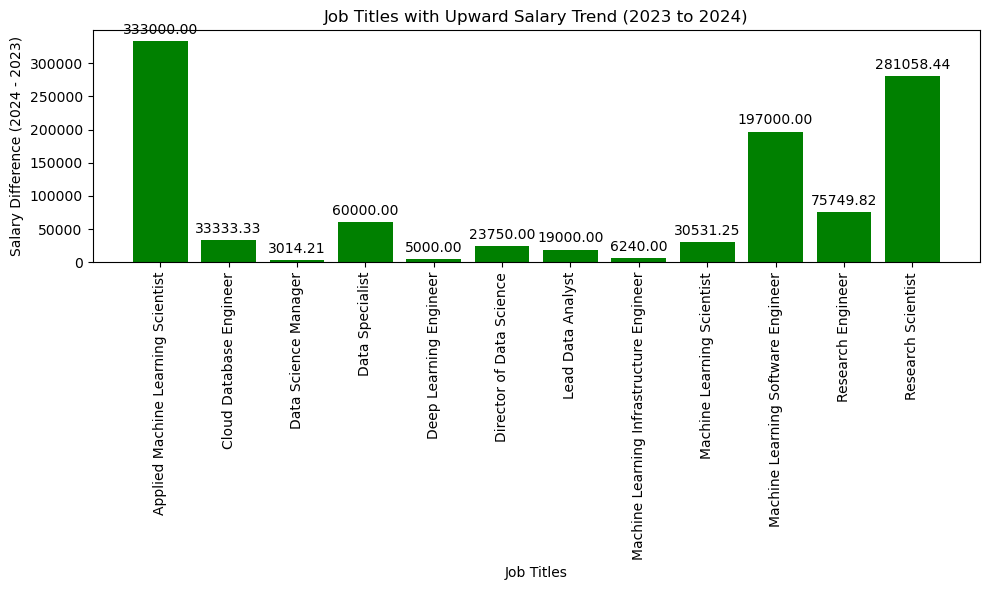

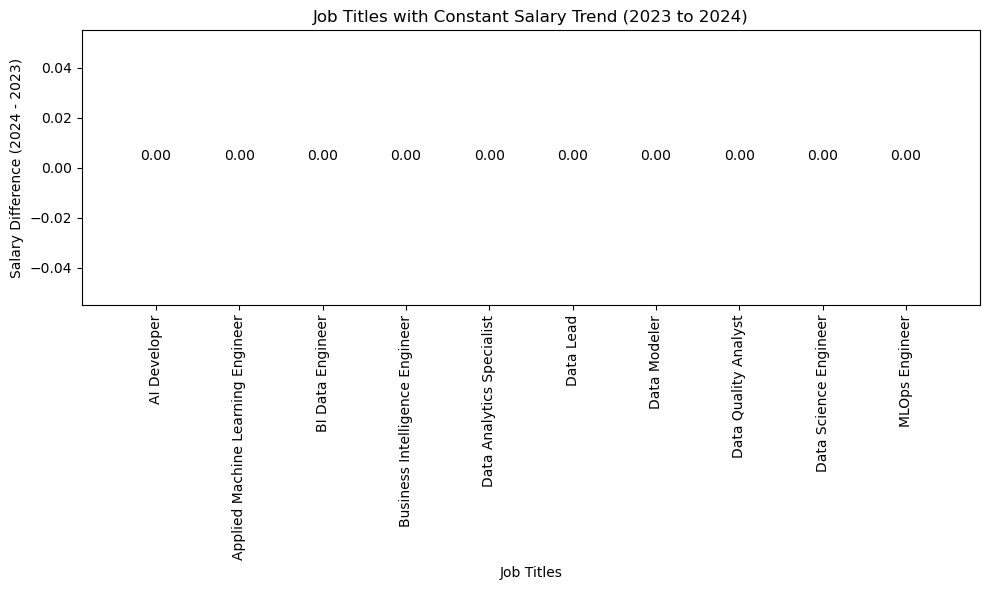

In [247]:
import matplotlib.pyplot as plt

# DataFrames for each trend category
upward_trend_df = comparison_df[comparison_df['salary_diff'] > 0]
downward_trend_df = comparison_df[comparison_df['salary_diff'] < 0]
constant_trend_df = comparison_df[comparison_df['salary_diff'] == 0]

# Function to add value labels to bar plots with adjusted y-coordinate
def add_value_labels(ax):
    for bar in ax.containers:
        for rect in bar:
            height = rect.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # Adjusted distance above the x-axis
                        textcoords="offset points",
                        ha='center', va='bottom')

# Plotting for upward trend
plt.figure(figsize=(10, 6))
ax1 = plt.bar(upward_trend_df['job_title'], upward_trend_df['salary_diff'], color='green')
plt.xlabel('Job Titles')
plt.ylabel('Salary Difference (2024 - 2023)')
plt.title('Job Titles with Upward Salary Trend (2023 to 2024)')
plt.xticks(rotation=90)
plt.tight_layout()
add_value_labels(plt.gca())
plt.show()

# Plotting for constant trend
plt.figure(figsize=(10, 6))
ax3 = plt.bar(constant_trend_df['job_title'], constant_trend_df['salary_diff'], color='blue')
plt.xlabel('Job Titles')
plt.ylabel('Salary Difference (2024 - 2023)')
plt.title('Job Titles with Constant Salary Trend (2023 to 2024)')
plt.xticks(rotation=90)
plt.tight_layout()
add_value_labels(plt.gca())
plt.show()


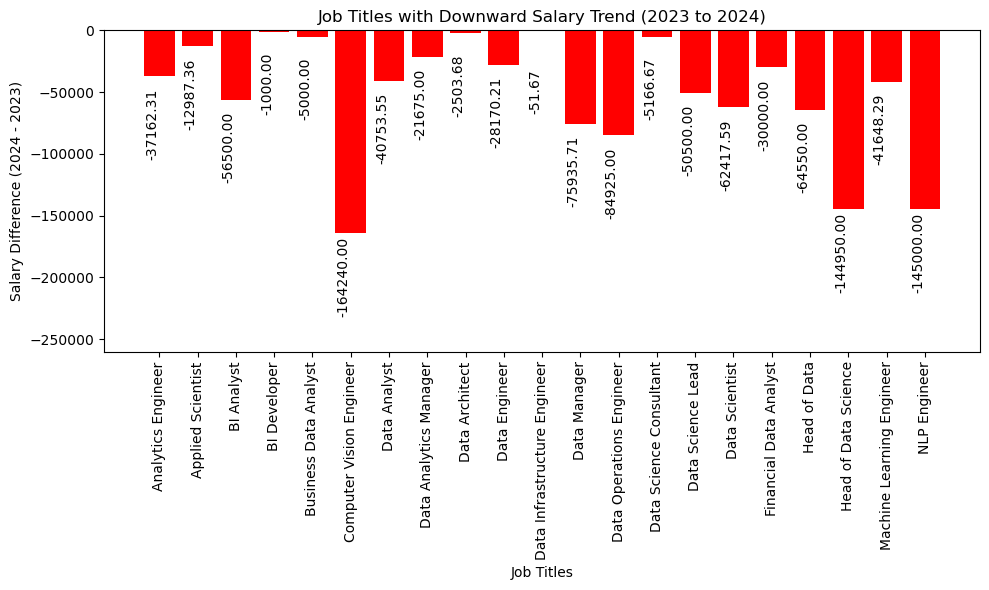

In [248]:
# Function to add value labels with custom rotation and distance below the bars
def add_value_labels(ax, distance):
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, -distance),  # Adjusted distance below the bar
                    textcoords="offset points",
                    rotation=90,  # Rotate the text by 45 degrees
                    ha='right',  # Horizontal alignment set to 'right' for better readability
                    va='bottom')

# Plotting for downward trend with adjusted value label position and rotation
plt.figure(figsize=(10, 6))
ax2 = plt.bar(downward_trend_df['job_title'], downward_trend_df['salary_diff'], color='red')
plt.xlabel('Job Titles')
plt.ylabel('Salary Difference (2024 - 2023)')
plt.title('Job Titles with Downward Salary Trend (2023 to 2024)')
plt.xticks(rotation=90)
plt.tight_layout()
add_value_labels(plt.gca(), 60)  # Adjusted distance of 6 cm (60 points) below each bar
plt.ylim(-260000, plt.gca().get_ylim()[1])  # Set y-axis limits from -260000 to current maximum
plt.show()

In [249]:
company_location=set(ds_salaries_df.company_location)
company_location=sorted(company_location)

In [250]:
salary_data_by_country=dict()

# Loop through each unique location
for i in company_location:
    # Initialize a temporary dictionary to store data for the current country
    temp_country_data=dict()
    
    # Loop through each row in the dataframe
    for index, row in ds_salaries_df.iterrows():
        # If the row's location matches the current location
        if row["company_location"] == i:
            # If the job title already exists in the dictionary, append the salary
            if temp_country_data.get(row['job_title']):
                temp_country_data[row['job_title']].append(row["salary_in_usd"])
            # If the job title does not exist in the dictionary, create a new list with the salary
            else:
                temp_country_data[row['job_title']] = [row["salary_in_usd"]]
    # Add the current country data dictionary to the main dictionary
    salary_data_by_country[i] =    temp_country_data 
#print(salary_data_by_country)

In [251]:
# Initialize a dictionary to store the most common job by country
most_common_job_by_country = dict()

# Loop through each country in the salary data
for i in salary_data_by_country.keys():
    # Initialize variables to store the job title and highest salary of the most common job
    temp_max = ('', '0') # Job title, Highest Salary
    highest_salary = 0
    
    # Loop through each job title in the country's data
    for j in salary_data_by_country[i].keys():
        # If the job title is more common than the current most common job, update the variables
        if len(salary_data_by_country[i][j]) > int(temp_max[1]):
            temp_max = (j, str(len(salary_data_by_country[i][j])))
            highest_salary = max(highest_salary, max(salary_data_by_country[i][j]))
    
    # Add the most common job and its count to the dictionary
    most_common_job_by_country[i] = {temp_max[0]: highest_salary}
print(most_common_job_by_country)

{'AE': {'Machine Learning Engineer': 120000}, 'AL': {'3D Computer Vision Researcher': 10000}, 'AM': {'Machine Learning Engineer': 50000}, 'AR': {'Machine Learning Engineer': 12000}, 'AS': {'3D Computer Vision Researcher': 20000}, 'AT': {'Data Scientist': 91237}, 'AU': {'AI Programmer': 70000}, 'BA': {'AI Developer': 120000}, 'BE': {'Data Scientist': 84053}, 'BO': {'Analytics Engineer': 7500}, 'BR': {'Data Scientist': 84000}, 'BS': {'Autonomous Vehicle Technician': 45555}, 'CA': {'Data Scientist': 258000}, 'CF': {'Data Analyst': 54685}, 'CH': {'Machine Learning Engineer': 104697}, 'CL': {'Data Scientist': 40038}, 'CN': {'Research Scientist': 100000}, 'CO': {'Data Manager': 65000}, 'CR': {'3D Computer Vision Researcher': 50000}, 'CZ': {'NLP Engineer': 5132}, 'DE': {'Data Scientist': 275000}, 'DK': {'Computer Vision Software Engineer': 19073}, 'DZ': {'Data Scientist': 100000}, 'EE': {'Data Scientist': 63312}, 'EG': {'Machine Learning Scientist': 22800}, 'ES': {'Data Engineer': 95000}, 'FI

In [252]:
# Initialize a dictionary to store the highest paid job by country
highest_paid_job_by_country = dict()

# Loop through each country in the salary data
for i in salary_data_by_country.keys():
    highest_salary = 0
    job_title = ''
    
    # Loop through each job title in the country's data
    for j in salary_data_by_country[i].keys():
        # If the job title has a higher salary than the current highest, update the variables
        if max(salary_data_by_country[i][j]) > highest_salary:
            highest_salary = max(salary_data_by_country[i][j])
            job_title = j
    
    # Add the highest paid job and its salary to the dictionary
    highest_paid_job_by_country[i] = {job_title: highest_salary}
#print(highest_paid_job_by_country)

In [253]:
# Print the most common job and highest paid job for each country
for i in company_location:
    print(f"Country: {i}, Most_common_job_title: {list(most_common_job_by_country[i].keys())[0]}, Most_common_highest_job_salary: {list(most_common_job_by_country[i].values())[0]}, Highest_paid_job_title: {list(highest_paid_job_by_country[i].keys())[0]}, Highest_paid_job_salary: {list(highest_paid_job_by_country[i].values())[0]} \n")

Country: AE, Most_common_job_title: Machine Learning Engineer, Most_common_highest_job_salary: 120000, Highest_paid_job_title: Machine Learning Engineer, Highest_paid_job_salary: 120000 

Country: AL, Most_common_job_title: 3D Computer Vision Researcher, Most_common_highest_job_salary: 10000, Highest_paid_job_title: 3D Computer Vision Researcher, Highest_paid_job_salary: 10000 

Country: AM, Most_common_job_title: Machine Learning Engineer, Most_common_highest_job_salary: 50000, Highest_paid_job_title: Machine Learning Engineer, Highest_paid_job_salary: 50000 

Country: AR, Most_common_job_title: Machine Learning Engineer, Most_common_highest_job_salary: 12000, Highest_paid_job_title: Data Analyst, Highest_paid_job_salary: 50000 

Country: AS, Most_common_job_title: 3D Computer Vision Researcher, Most_common_highest_job_salary: 20000, Highest_paid_job_title: Business Data Analyst, Highest_paid_job_salary: 50000 

Country: AT, Most_common_job_title: Data Scientist, Most_common_highest_j